In [3]:
!pip install statsmodels

In [4]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

In [6]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [7]:
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,73,58,11,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,22,10,82,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,61,66,68,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,76,49,5,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,83,65,10,22,23,64,79,35,7,1,320.280,5549,129.10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dept             86 non-null     int64  
 1   Region           85 non-null     object 
 2   Department       86 non-null     object 
 3   Crime_pers       86 non-null     int64  
 4   Crime_prop       86 non-null     int64  
 5   Literacy         86 non-null     int64  
 6   Donations        86 non-null     int64  
 7   Infants          86 non-null     int64  
 8   Suicides         86 non-null     int64  
 9   MainCity         86 non-null     object 
 10  Wealth           86 non-null     int64  
 11  Commerce         86 non-null     int64  
 12  Clergy           86 non-null     int64  
 13  Crime_parents    86 non-null     int64  
 14  Infanticide      86 non-null     int64  
 15  Donation_clergy  86 non-null     int64  
 16  Lottery          86 non-null     int64  
 17  Desertion        8

In [9]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]
df.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [10]:
df.shape

(86, 5)

In [11]:
df.isnull().sum()

Department    0
Lottery       0
Literacy      0
Wealth        0
Region        1
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

Department    0
Lottery       0
Literacy      0
Wealth        0
Region        0
dtype: int64

In [14]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')


In [19]:
len(y)

85

In [20]:
len(X)

85

In [21]:
y

,Lottery
0,41.0
1,38.0
2,66.0
3,80.0
4,79.0
...,...
80,68.0
81,40.0
82,55.0
83,14.0


In [22]:
X

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0
...,...,...,...,...,...,...,...
80,1.0,0.0,0.0,0.0,1.0,28.0,56.0
81,1.0,0.0,0.0,0.0,1.0,25.0,68.0
82,1.0,0.0,0.0,0.0,0.0,13.0,67.0
83,1.0,1.0,0.0,0.0,0.0,62.0,82.0


In [23]:
mod = sm.OLS(y, X)

In [26]:
res = mod.fit().summary()

In [27]:
print(res)

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.07e-05
Time:                        11:26:33   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

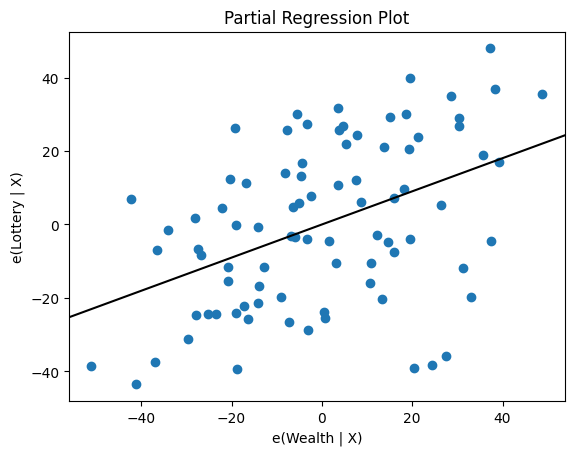

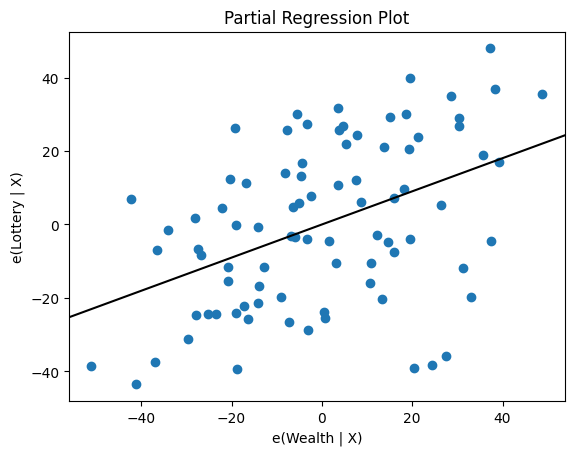

In [30]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Literacy', 'Region'], data=df, obs_labels=False)

In [32]:
%matplotlib inline

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [35]:
msample = 100

In [37]:
x = np.linspace(0, 10, msample)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=msample)

In [38]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [39]:
X

array([[0.00000000e+00, 0.00000000e+00],
       [1.01010101e-01, 1.02030405e-02],
       [2.02020202e-01, 4.08121620e-02],
       [3.03030303e-01, 9.18273646e-02],
       [4.04040404e-01, 1.63248648e-01],
       [5.05050505e-01, 2.55076013e-01],
       [6.06060606e-01, 3.67309458e-01],
       [7.07070707e-01, 4.99948985e-01],
       [8.08080808e-01, 6.52994592e-01],
       [9.09090909e-01, 8.26446281e-01],
       [1.01010101e+00, 1.02030405e+00],
       [1.11111111e+00, 1.23456790e+00],
       [1.21212121e+00, 1.46923783e+00],
       [1.31313131e+00, 1.72431385e+00],
       [1.41414141e+00, 1.99979594e+00],
       [1.51515152e+00, 2.29568411e+00],
       [1.61616162e+00, 2.61197837e+00],
       [1.71717172e+00, 2.94867871e+00],
       [1.81818182e+00, 3.30578512e+00],
       [1.91919192e+00, 3.68329762e+00],
       [2.02020202e+00, 4.08121620e+00],
       [2.12121212e+00, 4.49954086e+00],
       [2.22222222e+00, 4.93827160e+00],
       [2.32323232e+00, 5.39740843e+00],
       [2.424242

In [40]:
beta

array([ 1. ,  0.1, 10. ])

In [41]:
e

array([-0.38718224,  1.34750555, -0.28914534, -0.28739435,  1.13362036,
       -0.82777621,  0.81212358,  1.49485767, -0.73997491,  0.9899225 ,
        1.5368094 ,  0.21777142, -0.63691348, -0.1884181 , -0.75622188,
       -0.58032814,  1.31614253,  0.43801312, -1.11035372,  2.48369112,
       -2.10313253, -1.19077512,  1.76413537,  0.39882063,  0.60274404,
       -1.33410368,  0.59404215,  0.2280272 , -1.38519923,  0.25317359,
        0.49635039, -0.97353209, -0.17018959,  0.46995879, -1.02969724,
        0.14508107, -1.1094655 ,  0.89404327, -0.6749182 ,  0.23242474,
       -0.52116217,  1.96764579,  1.320591  ,  0.0824607 , -0.49649432,
        1.40242876,  0.79758634, -0.22566254,  1.05111585, -0.32272877,
        0.08410924, -0.46676795,  0.49183648, -0.95426506, -0.28561134,
        0.14861346, -1.34798558,  0.13669741, -0.89185094, -0.38226593,
       -1.60631302, -1.93131828,  0.1798654 , -1.46849158,  1.28615323,
        0.50711714, -0.66825952, -0.32547847,  0.13080946, -0.25

In [42]:
e.shape

(100,)

In [43]:
len(e)

100

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
np.random.seed(9876789)

In [4]:
nsample = 100
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [6]:
x.shape

(100,)

In [9]:
pd.DataFrame(X)

,0,1
0,0.00000,0.000000
1,0.10101,0.010203
2,0.20202,0.040812
3,0.30303,0.091827
4,0.40404,0.163249
...,...,...
95,9.59596,92.082441
96,9.69697,94.031221
97,9.79798,96.000408
98,9.89899,97.990001


In [10]:
X = sm.add_constant(X)

In [12]:
pd.DataFrame(X, columns=['const', 'x', 'x2'])

,const,x,x2
0,1.0,0.00000,0.000000
1,1.0,0.10101,0.010203
2,1.0,0.20202,0.040812
3,1.0,0.30303,0.091827
4,1.0,0.40404,0.163249
...,...,...,...
95,1.0,9.59596,92.082441
96,1.0,9.69697,94.031221
97,1.0,9.79798,96.000408
98,1.0,9.89899,97.990001


In [13]:
e

array([-0.84051589,  1.59749526,  0.46554204, -0.50815894,  2.9343057 ,
        0.41289442, -0.94327249, -0.57123425,  0.32858663, -0.0366525 ,
        0.31112907, -0.37669932,  0.77808263,  0.68679035,  1.13861032,
       -1.81097906,  1.79143041, -1.14101066,  0.1509316 , -1.12517637,
       -0.48275237,  0.30494993, -1.84273534,  0.25853029,  0.38763454,
        1.86902659,  0.79214331,  0.13115781,  1.95611929,  0.90628723,
       -0.66993563,  1.50468525, -0.80159745,  0.63443322, -0.63948555,
        0.01666895, -0.91296139, -1.92184982, -1.27844098, -0.47279903,
       -0.55563717,  0.76092128,  0.4153819 , -1.19774989,  0.37679027,
        2.16159889, -0.71984746,  1.21728985,  0.52372572, -1.03490772,
       -0.32784716, -0.62777984, -0.02704057,  0.69709085, -1.07004579,
        1.02823293, -1.31037458,  1.42819204, -0.31421789, -1.85161717,
        0.69924406, -1.65204921, -2.22070116,  1.11719669, -0.09771428,
       -0.20044925,  0.86762984, -0.32157153, -0.87503573, -0.52

In [14]:
y = np.dot(X, beta) + e

In [15]:
pd.DataFrame(y)

,0
0,0.159484
1,2.709627
2,1.893866
3,1.440418
4,5.607196
...,...
95,923.205757
96,944.357509
97,960.546815
98,982.038002


In [16]:
model = sm.OLS(y, X)

In [18]:
results = model.fit()

In [19]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          2.83e-239
Time:                        08:41:52   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [20]:
print(results.params)

[ 1.34233516 -0.04024948 10.01025357]


In [21]:
print(results.rsquared)

0.9999879365025871


In [22]:
pred_ols = results.get_prediction()

In [28]:
iv_1 = pred_ols.summary_frame()['obs_ci_lower']
iv_2 = pred_ols.summary_frame()['obs_ci_upper']

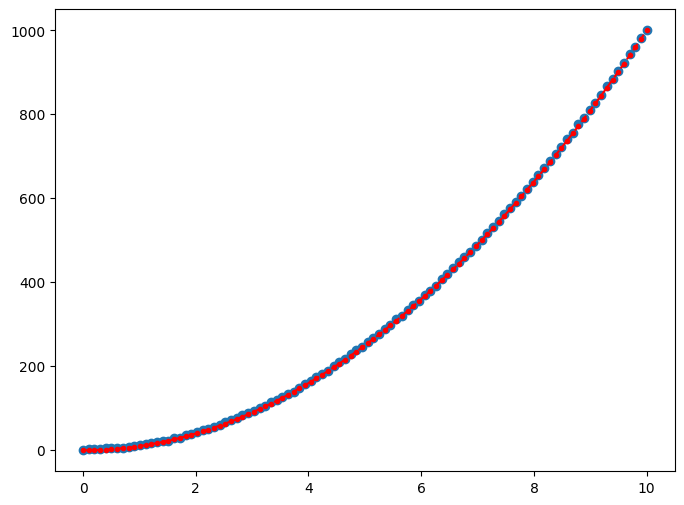

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, iv_1, 'r--.', label="OLS")

In [42]:
# KNN CLASSIFICATION AVEC SCIKIT-LEARN
import numpy as np
import pandas as pd
size = 10000

In [43]:
gender = ['male', 'femme']
gender = np.random.choice(gender, size=size, p=[0.6, 0.4])

In [44]:
age = np.random.randint(19, 45, size=size)

In [45]:
salaire = np.random.randint(10000, 100000, size=size)

In [46]:
but = np.random.choice([0, 1], size=size, p=[0.6, 0.4])

In [47]:
df = pd.DataFrame({'gender': gender, 'age': age, 'salaire': salaire, 'but': but})
df.head()

,gender,age,salaire,but
0,male,37,85801,1
1,male,31,17106,1
2,male,27,87079,0
3,femme,32,10332,1
4,femme,21,86902,1


In [49]:
def freq_value(x):
    return round(x.value_counts(normalize = True, sort = True, ascending = True), 2)

In [50]:
freq_value(df['gender'])

gender
femme    0.4
male     0.6
Name: proportion, dtype: float64

In [51]:
freq_value(df['but'])

but
1    0.39
0    0.61
Name: proportion, dtype: float64

In [56]:
x = df.drop('but', axis=1).values
y = df['but'].values

In [57]:
x

array([['male', 37, 85801],
       ['male', 31, 17106],
       ['male', 27, 87079],
       ...,
       ['male', 20, 19246],
       ['male', 29, 40393],
       ['male', 35, 50937]], dtype=object)

In [58]:
y

array([1, 1, 0, ..., 1, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
st_x = StandardScaler()

In [63]:
x_train = st_x.fit_transform(x_train)

ValueError: could not convert string to float: 'femme'